Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         

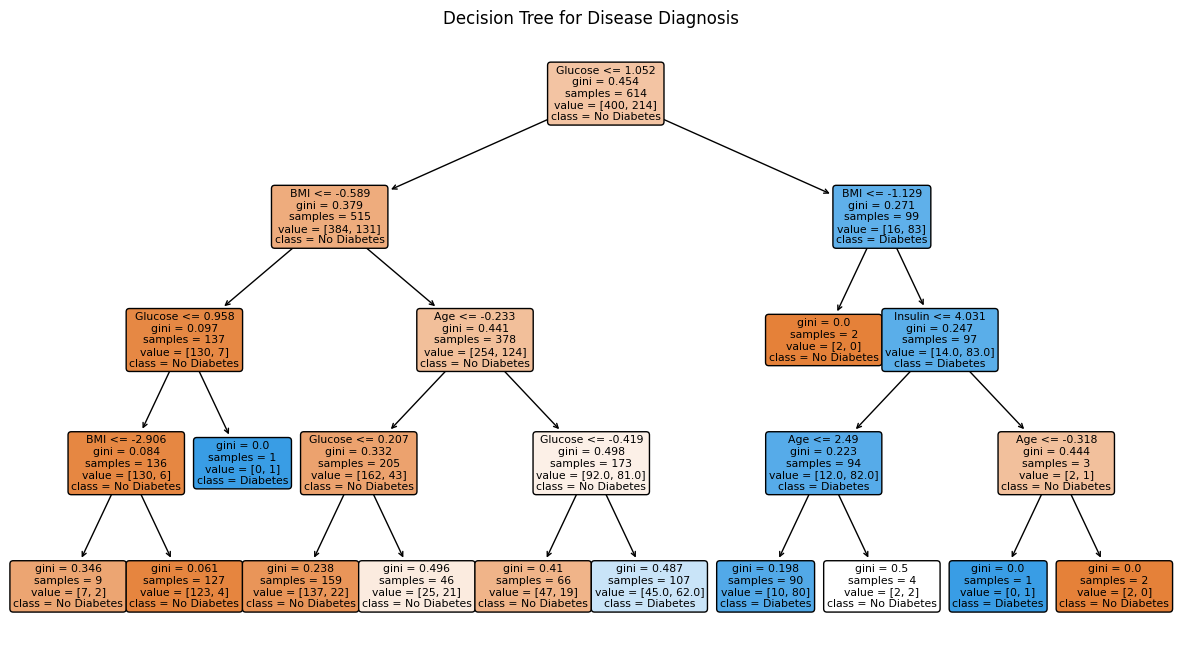


--- SVM Results ---
Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



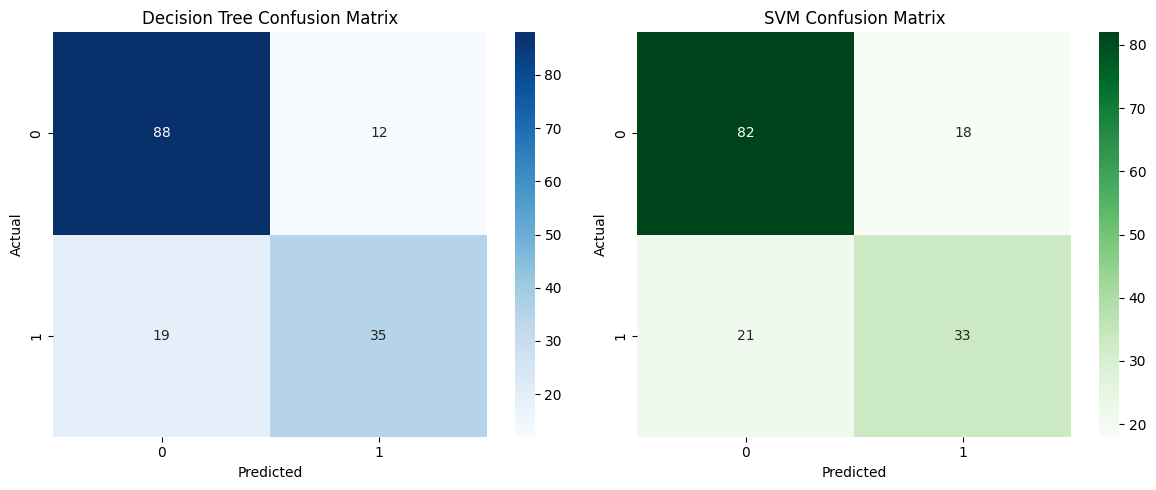


--- Decision Tree Feature Importance ---
                    Feature  Importance
1                   Glucose    0.670911
5                       BMI    0.174665
7                       Age    0.138818
4                   Insulin    0.015606
0               Pregnancies    0.000000
2             BloodPressure    0.000000
3             SkinThickness    0.000000
6  DiabetesPedigreeFunction    0.000000


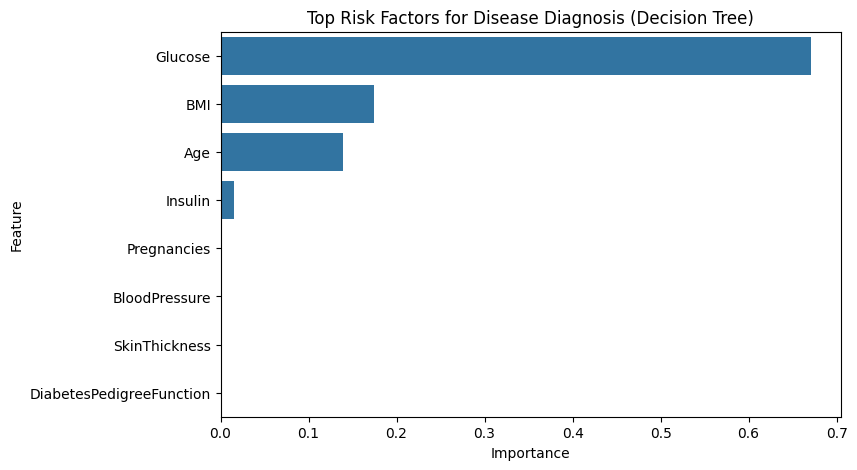

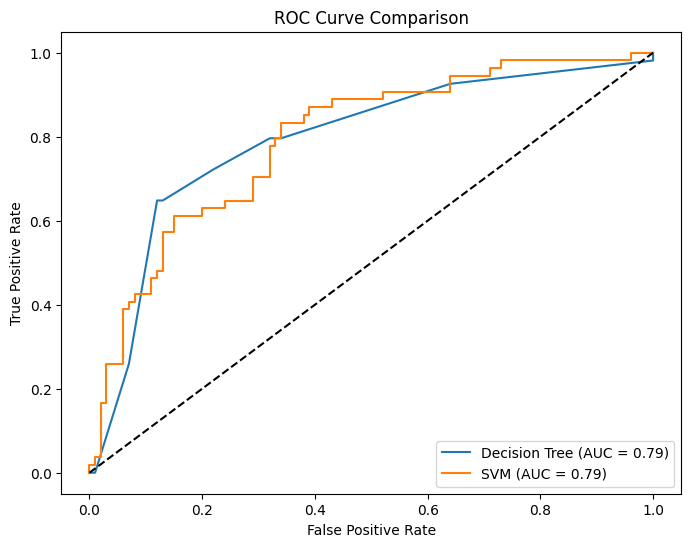


✅ Disease diagnosis analysis completed. Feature importance saved.


In [1]:
# ============================================================
# Experiment 8: Diagnose Disease Risk from Patient Data
# ============================================================

# 1.1 Aim:
# Predict disease risk from patient data using ML models.

# 1.2 Lab Outcome:
# Prepare healthcare datasets for analysis and predictive modeling.

# 1.3 Learning Outcome:
# Analyze patient data to stratify disease risk and interpret feature importance.

# ============================================================
# Step 1: Import Required Libraries
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# ============================================================
# Step 2: Load Dataset
# ============================================================

df = pd.read_csv("diabetes.csv")  # Ensure dataset is downloaded from Kaggle
print("Dataset Shape:", df.shape)
df.head()

# ============================================================
# Step 3: Data Understanding & Cleaning
# ============================================================

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ============================================================
# Step 4: Decision Tree Classifier
# ============================================================

dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # limit depth for interpretability
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes','Diabetes'], filled=True, rounded=True)
plt.title("Decision Tree for Disease Diagnosis")
plt.show()

# ============================================================
# Step 5: Support Vector Machine (SVM) Classifier
# ============================================================

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# ============================================================
# Step 6: Confusion Matrix Visualization
# ============================================================

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ============================================================
# Step 7: Feature Importance (Decision Tree)
# ============================================================

importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Decision Tree Feature Importance ---")
print(importance_dt)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_dt)
plt.title("Top Risk Factors for Disease Diagnosis (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# ============================================================
# Step 8: ROC Curve for Both Models
# ============================================================

# Decision Tree probabilities
y_prob_dt = dt_model.predict_proba(X_test)[:,1]
# SVM probabilities
y_prob_svm = svm_model.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# ============================================================
# Step 9: Save Results
# ============================================================

importance_dt.to_csv("decision_tree_feature_importance.csv", index=False)
print("\n✅ Disease diagnosis analysis completed. Feature importance saved.")
